In [19]:
import pandas as pd
import numpy as np

# Load the Excel file
data = pd.read_excel("Transportation.xlsx", header = [0])

# Show the first few rows of the dataframe
data.head()

""


It seems there was an issue reading the file, as the resulting DataFrame is empty. This could happen due to several reasons such as incorrect formatting, the data being located on a different sheet than the default one, or other issues related to the file's structure.

Let's try to identify the issue by checking the names of the sheets in your Excel file.

In [20]:
data.dtypes

Series([], dtype: object)

In [87]:
# Load the Excel file again, this time only to get the sheet names
excel_file = pd.ExcelFile("Transportation.xlsx")

# Get the sheet names
sheet_names = excel_file.sheet_names

sheet_names

['Summary', 'Database']

The Excel file contains two sheets named 'Summary' and 'Database'. The data might be located in one of these sheets rather than the default one. Let's try reading the data from these sheets separately and see if we can retrieve your data.

In [22]:
# Load the data from the 'Summary' sheet
data_summary = pd.read_excel(excel_file, 'Summary')

# Load the data from the 'Database' sheet
data_database = pd.read_excel(excel_file, 'Database')

# Show the first few rows of each dataframe
data_summary.head(), data_database.head()

(Empty DataFrame
 Columns: []
 Index: [],
   Entry ID      Freight forwarder    Transporter Depart From Arrive To  \
 0     DL-1  Freight forwarder ABC  Transporter A   Mogadishu  Victoria   
 1     DL-8  Freight forwarder ABC  Transporter A   Mogadishu     Sanaa   
 2     DL-9  Freight forwarder ABC  Transporter A   Mogadishu  Victoria   
 3    DL-10  Freight forwarder ABC  Transporter A   Mogadishu     Alger   
 4    DL-11  Freight forwarder ABC  Transporter A     Mombasa     Alger   
 
    Loading Date  Offloading Date Client Invoice status  \
 0         44568          44588.0              Invoiced   
 1         44564          44589.0                  Paid   
 2         44570          44588.0                  Paid   
 3         44573          44589.0                  Paid   
 4         44568          44589.0                  Paid   
 
   Transporter Invoice status Service / Product: Product Name  Gross Weight(t)  \
 0                   Invoiced                  TRANSPORTATION       

In [54]:
data_database.shape

(3581, 21)

In [55]:
data_database.keys()

Index(['Entry ID', 'Freight forwarder', 'Transporter', 'Depart From',
       'Arrive To', 'Loading Date', 'Offloading Date', 'Client Invoice status',
       'Transporter Invoice status', 'Service / Product: Product Name',
       'Gross Weight(t)', 'Client Rate per t', 'Client Currency',
       'Supplier Rate per t', 'Supplier Currency', 'POD Attached',
       'Delay at toll gate in days', 'Delay at workshop in days',
       'Delay at border in days', 'Transit Time', 'Total Delay'],
      dtype='object')

In [52]:
data_database['Freight forwarder'].unique() #Avoid this variable from the analysis

array(['Freight forwarder ABC'], dtype=object)

In [34]:
data_database['Transporter'].unique()

array(['Transporter A', 'Transporter C', 'Transporter B'], dtype=object)

In [56]:
data_database['Service / Product: Product Name'].unique()

array(['TRANSPORTATION', 'FOB', 'SECURITY & ESCORT'], dtype=object)

##### Service/Product is also not a major factor as all the 3 different values in this variable, are carried by multiple transporters. Instead we shall do an analytics on the transporters and their respective3 delay time.

We have 3 variables which shows the delay in delivery at certain points such as workshop, border and toll gate.

We have 2 dates such as loading date and offloading date.

We have 4 rates variables such as client rates, supplier rates and their currencies.

We have 2 location variables such as Arrive to, and Depart from.

We have 2 company variables of Freight forwarder and transporter.

We have 2 invoice update variables such as Client invoice status and Transporter invoice status.

We have other variables such as Entry ID, Service/Product, Product name, POD attached and gross weight.

Total: 20 variables.

In [23]:
###### Convert the Excel date format to datetime
data_database['Loading Date'] = pd.to_datetime(data_database['Loading Date'], unit='D', origin='1899-12-30')
data_database['Offloading Date'] = pd.to_datetime(data_database['Offloading Date'], unit='D', origin='1899-12-30')

# Calculate the transit time in days
data_database['Transit Time'] = (data_database['Offloading Date'] - data_database['Loading Date']).dt.days

# Display the updated DataFrame
data_database.head()


,Entry ID,Freight forwarder,Transporter,Depart From,Arrive To,Loading Date,Offloading Date,Client Invoice status,Transporter Invoice status,Service / Product: Product Name,Gross Weight(t),Client Rate per t,Client Currency,Supplier Rate per t,Supplier Currency,POD Attached,Delay at toll gate in days,Delay at workshop in days,Delay at border in days,Transit Time
0,DL-1,Freight forwarder ABC,Transporter A,Mogadishu,Victoria,2022-01-07,2022-01-27,Invoiced,Invoiced,TRANSPORTATION,27.108,600,USD,300,USD,1,2.0,3.00,2.500,20.0
1,DL-8,Freight forwarder ABC,Transporter A,Mogadishu,Sanaa,2022-01-03,2022-01-28,Paid,Invoiced,TRANSPORTATION,31.124,600,USD,300,USD,0,2.5,3.75,3.125,25.0
2,DL-9,Freight forwarder ABC,Transporter A,Mogadishu,Victoria,2022-01-09,2022-01-27,Paid,Invoiced,TRANSPORTATION,31.124,600,USD,300,USD,1,1.8,2.70,2.250,18.0
3,DL-10,Freight forwarder ABC,Transporter A,Mogadishu,Alger,2022-01-12,2022-01-28,Paid,Invoiced,TRANSPORTATION,31.124,600,USD,300,USD,1,1.6,2.40,2.000,16.0
4,DL-11,Freight forwarder ABC,Transporter A,Mombasa,Alger,2022-01-07,2022-01-28,Paid,Invoiced,TRANSPORTATION,31.124,600,USD,300,USD,1,2.1,3.15,2.625,21.0


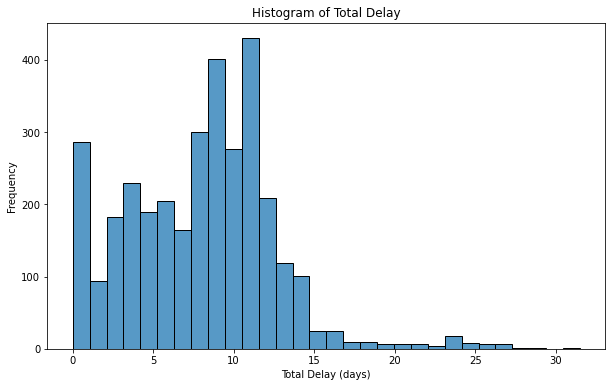

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the column 'Unnamed: 19' as it contains only NaN values
#data_database.drop('Unnamed: 19', axis=1, inplace=True)

# Calculate total delay at each location:
data_database['Total Delay'] = data_database['Delay at toll gate in days'] + data_database['Delay at workshop in days'] + data_database['Delay at border in days']

# Plot histogram of Total Delay
plt.figure(figsize=(10, 6))
sns.histplot(data_database['Total Delay'], kde=False, bins=30)
plt.title('Histogram of Total Delay')
plt.xlabel('Total Delay (days)')
plt.ylabel('Frequency')
plt.show()


In [26]:
data_database['Total Delay'].describe()

count    3319.000000
mean        7.873644
std         4.625281
min         0.000000
25%         4.500000
50%         8.625000
75%        10.500000
max        31.500000
Name: Total Delay, dtype: float64

Insight 1: The histogram of total delay shows that the majority of shipments experience a delay between 4.5 to 10.5 days. There are very few shipments with extremely high delay times, indicating that such cases might be outliers or exceptional situations.

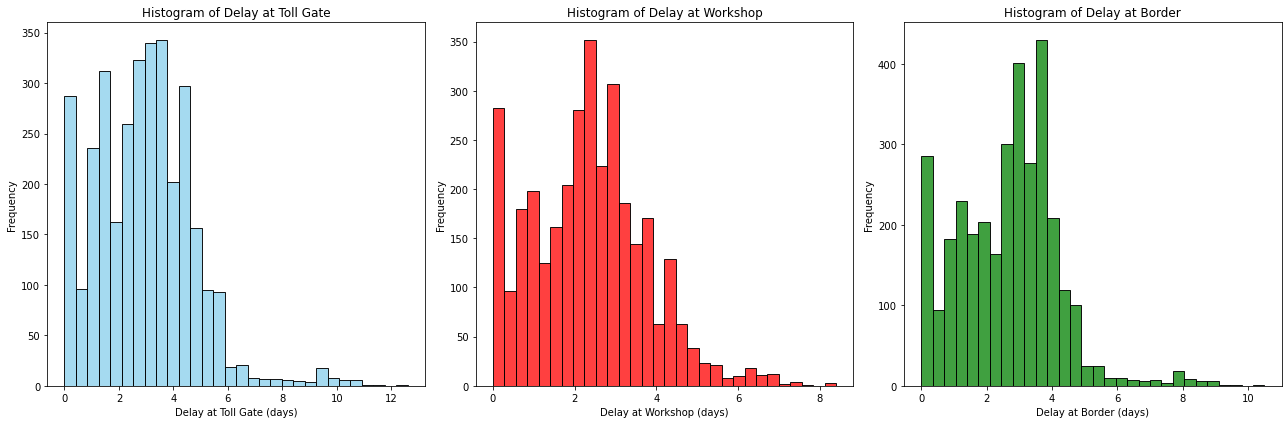

In [27]:
# Plot individual sources of delay

plt.figure(figsize=(18, 6))

# Delay at toll gate
plt.subplot(1, 3, 1)
sns.histplot(data_database['Delay at toll gate in days'], kde=False, bins=30, color='skyblue')
plt.title('Histogram of Delay at Toll Gate')
plt.xlabel('Delay at Toll Gate (days)')
plt.ylabel('Frequency')

# Delay at workshop
plt.subplot(1, 3, 2)
sns.histplot(data_database['Delay at workshop in days'], kde=False, bins=30, color='red')
plt.title('Histogram of Delay at Workshop')
plt.xlabel('Delay at Workshop (days)')
plt.ylabel('Frequency')

# Delay at border
plt.subplot(1, 3, 3)
sns.histplot(data_database['Delay at border in days'], kde=False, bins=30, color='green')
plt.title('Histogram of Delay at Border')
plt.xlabel('Delay at Border (days)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [28]:
print(data_database['Delay at toll gate in days'].describe())
print(data_database['Delay at workshop in days'].describe())
print(data_database['Delay at border in days'].describe())

count    3319.000000
mean        2.909551
std         1.814267
min         0.000000
25%         1.500000
50%         2.900000
75%         4.050000
max        12.600000
Name: Delay at toll gate in days, dtype: float64
count    3319.000000
mean        2.339545
std         1.428766
min         0.000000
25%         1.300000
50%         2.300000
75%         3.200000
max         8.400000
Name: Delay at workshop in days, dtype: float64
count    3319.000000
mean        2.624548
std         1.541760
min         0.000000
25%         1.500000
50%         2.875000
75%         3.500000
max        10.500000
Name: Delay at border in days, dtype: float64


Insight 2: Delays at the toll gate, workshop, and border all follow a somewhat similar distribution, with the majority of delays falling within a certain range and fewer instances of extreme delays. This suggests that while delays do occur, they are generally kept within a manageable timeframe.

Insight 3: The histogram of delays at the toll gate, workshop, and border show that these three factors contribute to the overall delay, and their distributions are quite similar. The majority of delays are concentrated around 2-4 days for each factor.

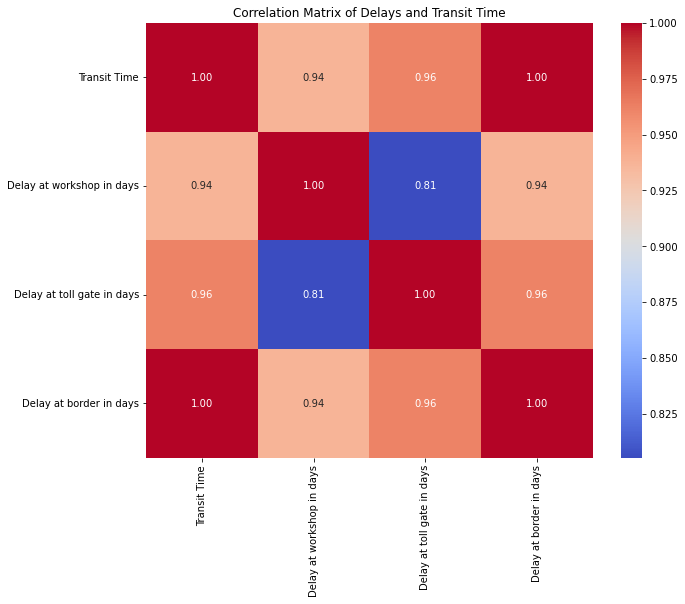

In [43]:
# Calculate the correlation matrix
corr_matrix = data_database[['Transit Time', 'Delay at workshop in days', 'Delay at toll gate in days', 
                             'Delay at border in days']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Delays and Transit Time')
plt.show()



Insight 4: The heatmap of correlations shows that the transit time is positively correlated with delays at the toll gate, workshop, and border. This means that as the delay in any of these areas increases, the overall transit time tends to increase as well.

Insight 5: Delays at the workshop are most strongly correlated with the overall transit time, suggesting that reducing workshop delays could have the most substantial impact on reducing transit time. Border waiting period also has a very strong transit time efficiency issue. Slightly there is less correlation between the workshop delay and toll gate delay from the given dataset.

Insight 6: There is also a strong correlation between the different types of delays, indicating that when there is a delay in one area (e.g., the workshop), there tends to be a delay in other areas as well (e.g., toll gate or border). This could suggest systemic issues in the logistics process that cause cascading delays.

In [61]:
#Transporter:

In [60]:
data_database['Transporter'].unique()

array(['Transporter A', 'Transporter C', 'Transporter B'], dtype=object)

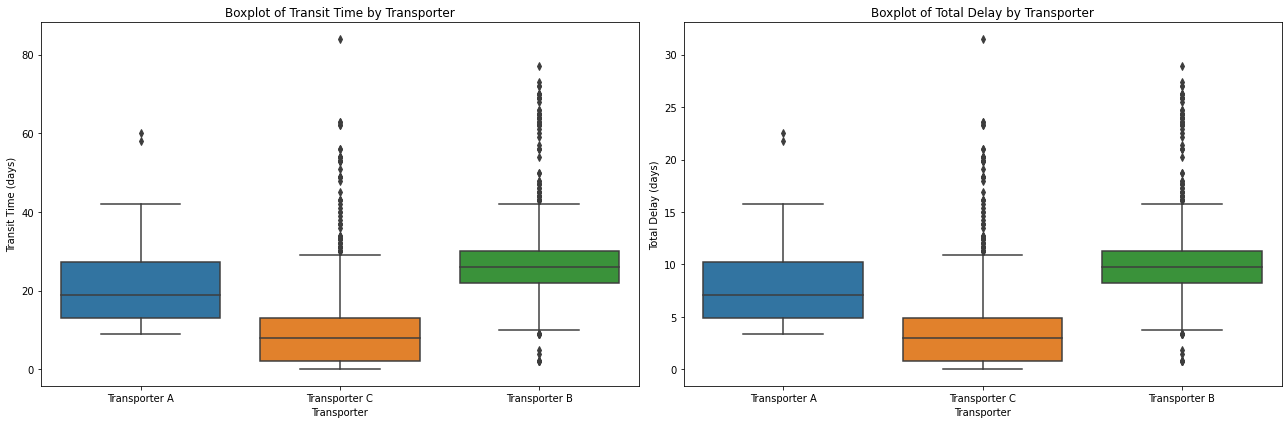

In [62]:
# Plot boxplots of transit time and total delay for each transporter

plt.figure(figsize=(18, 6))

# Transit time
plt.subplot(1, 2, 1)
sns.boxplot(x='Transporter', y='Transit Time', data=data_database)
plt.title('Boxplot of Transit Time by Transporter')
plt.xlabel('Transporter')
plt.ylabel('Transit Time (days)')

# Total delay
plt.subplot(1, 2, 2)
sns.boxplot(x='Transporter', y='Total Delay', data=data_database)
plt.title('Boxplot of Total Delay by Transporter')
plt.xlabel('Transporter')
plt.ylabel('Total Delay (days)')

plt.tight_layout()
plt.show()


In [63]:
# Calculate the descriptive statistics for Total Delay grouped by Transporter:
delay_stats_by_transporter = data_database.groupby('Transporter')['Total Delay'].describe()

# Show the statistics
delay_stats_by_transporter

,count,mean,std,min,25%,50%,75%,max
Transporter,,,,,,,,
Transporter A,128.0,7.643555,3.398742,3.375,4.875,7.125,10.21875,22.500
Transporter B,2113.0,9.987636,3.357281,0.750,8.250,9.750,11.25000,28.875
Transporter C,1078.0,3.757305,4.087599,0.000,0.750,3.000,4.87500,31.500


Insight 7: The transit time varies significantly between different transporters, as shown in the boxplot. Some transporters tend to have shorter transit times, while others have longer transit times. The variation in transit times within each transporter (as indicated by the height of the boxes and the length of the whiskers) also suggests that there are factors other than the transporter that affect transit time.

### However, Transporter C seems to have lesser delay time. Comapring transporters A and B, median value of B is higher to A, and hence Transporter B could be one variable which impact the higher transit time.

Insight 8: Similarly, the total delay also varies between different transporters. Some transporters experience longer delays, while others have shorter delays. This could be due to various factors, such as the efficiency of the transporter, the routes they use, their load management practices, and so on.

### Here also, Transporter B has higher delay time, looking at the analysis.

Insight 9: For some transporters, there is a wide range of transit times and total delays, indicating a high level of variability in their operations. This could suggest inconsistency in their processes, potentially leading to unpredictability for customers.

In [64]:
#Gross weight and Delay at workshop, tollgate and border:

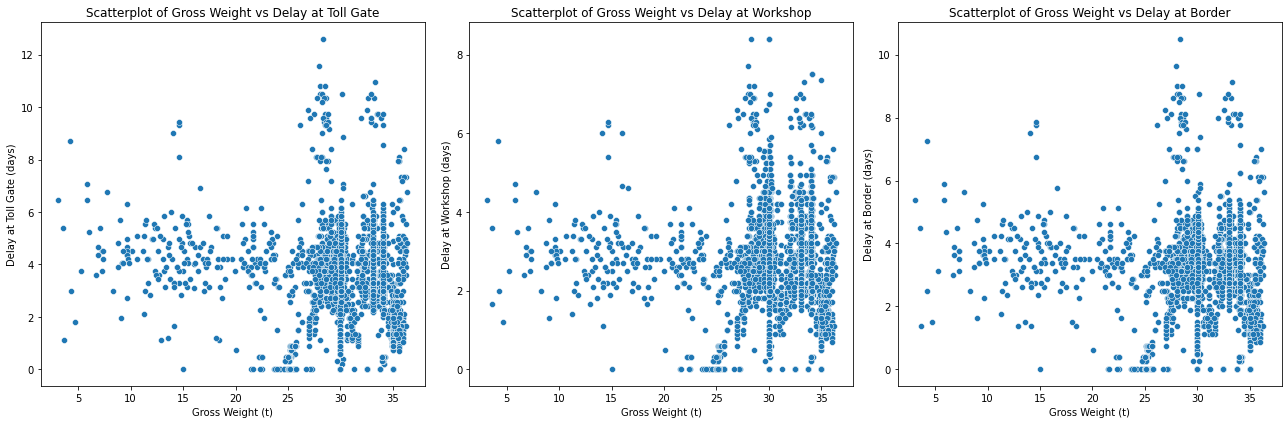

In [59]:
# Plot scatterplots of gross weight against each type of delay

plt.figure(figsize=(18, 6))

# Delay at toll gate
plt.subplot(1, 3, 1)
sns.scatterplot(x='Gross Weight(t)', y='Delay at toll gate in days', data=data_database)
plt.title('Scatterplot of Gross Weight vs Delay at Toll Gate')
plt.xlabel('Gross Weight (t)')
plt.ylabel('Delay at Toll Gate (days)')

# Delay at workshop
plt.subplot(1, 3, 2)
sns.scatterplot(x='Gross Weight(t)', y='Delay at workshop in days', data=data_database)
plt.title('Scatterplot of Gross Weight vs Delay at Workshop')
plt.xlabel('Gross Weight (t)')
plt.ylabel('Delay at Workshop (days)')

# Delay at border
plt.subplot(1, 3, 3)
sns.scatterplot(x='Gross Weight(t)', y='Delay at border in days', data=data_database)
plt.title('Scatterplot of Gross Weight vs Delay at Border')
plt.xlabel('Gross Weight (t)')
plt.ylabel('Delay at Border (days)')

plt.tight_layout()
plt.show()


Insight 10: The scatterplots show that there is no clear relationship between the gross weight of the freight and the delays at the toll gate, workshop, or border. This suggests that the weight of the freight does not directly influence these types of delays.

Insight 11: Despite the lack of a clear trend, there is a spread of delay times across different weights, indicating variability in the logistics process. This variability could be due to other factors, such as the specific route taken, the efficiency of the transporter, or external factors like weather or traffic conditions.

In [65]:
#POD attached and total delay:

In [66]:
data_database['POD Attached'].unique()

array([1, 0], dtype=int64)

In [67]:
# 1 is without POD and 0 is with POD:

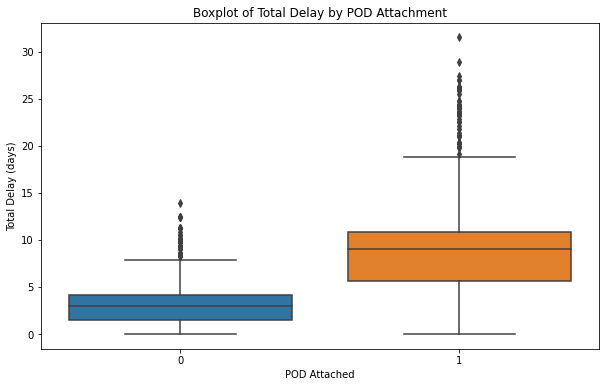

In [68]:
# Plot boxplots of total delay for shipments with and without POD

plt.figure(figsize=(10, 6))
sns.boxplot(x='POD Attached', y='Total Delay', data=data_database)
plt.title('Boxplot of Total Delay by POD Attachment')
plt.xlabel('POD Attached')
plt.ylabel('Total Delay (days)')
plt.show()


Insight 12: The boxplot shows that there is a significant difference in total delay between shipments with a Proof of Delivery (POD) attached and those without. Shipments without a POD tend to have longer total delays. This could suggest that the lack of a POD may lead to inefficiencies or complications in the logistics process that result in delays.

Insight 13: The range of total delays is also larger for shipments without a POD, indicating a higher level of variability in these cases. 
### This could suggest that the lack of a POD makes the logistics process less predictable and more prone to unexpected delays.

In [69]:
#Client invoice status:

In [70]:
data_database['Client Invoice status'].unique()

array(['Invoiced', 'Paid', nan, 'Approval Pending', 'Draft'], dtype=object)

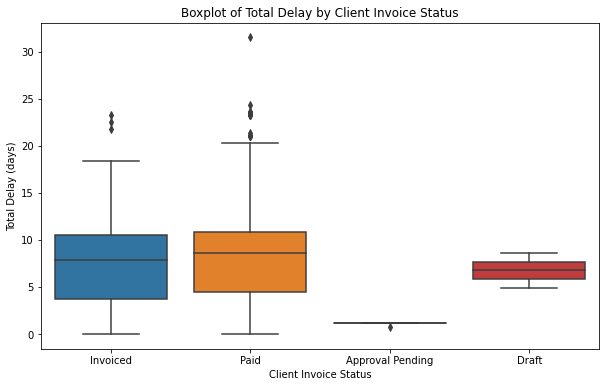

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Client Invoice status', y='Total Delay', data=data_database)
plt.title('Boxplot of Total Delay by Client Invoice Status')
plt.xlabel('Client Invoice Status')
plt.ylabel('Total Delay (days)')
plt.show()

In [58]:
# Calculate the descriptive statistics for Total Delay grouped by Client Invoice status
delay_stats_by_invoice_status = data_database.groupby('Client Invoice status')['Total Delay'].describe()

# Show the statistics
delay_stats_by_invoice_status

,count,mean,std,min,25%,50%,75%,max
Client Invoice status,,,,,,,,
Approval Pending,5.0,1.050000,0.167705,0.750,1.1250,1.125,1.1250,1.125
Draft,2.0,6.750000,2.651650,4.875,5.8125,6.750,7.6875,8.625
Invoiced,1147.0,7.198235,4.145124,0.000,3.7500,7.875,10.5000,23.250
Paid,1799.0,7.893552,4.578301,0.000,4.5000,8.625,10.8750,31.500


Insight 14: The boxplot shows some variation in total delay depending on the client invoice status. Shipments with an invoice status of 'Invoiced' and 'Paid' seems to be almost same to each other in mean, median and standard deviation. It is unable to predict whether the status of 'Paid' makes it easy for the faster delivery.

Insight 15: There is also a significant amount of variability in total delay within each invoice status category, as shown by the height of the boxes and the length of the whiskers. This indicates that while invoice status may influence delay times, there are also other factors at play.

Outlier reason: Outliers could be happening due to many reasons such as different routes, non-supportive weather conditions, breakdown etc.Or maybe the inconsistency in the data. Lot of outliers actually affects the mean of the data which makes it lesser or higher than the median. Hence median is used as a central tendancy for the data with many outliers.

Skewness test: In our dataset, the outliers are seen more than the maximum value,however from the statistical analysis we could see that there is a symmetry. However there is a slight skew to the left which could be avoidable, as there is no much impact in the central tendency. 

In [71]:
#Client rate per t:

In [72]:
data_database['Client Rate per t'].unique()

array([ 600,  100,   20, 4000], dtype=int64)

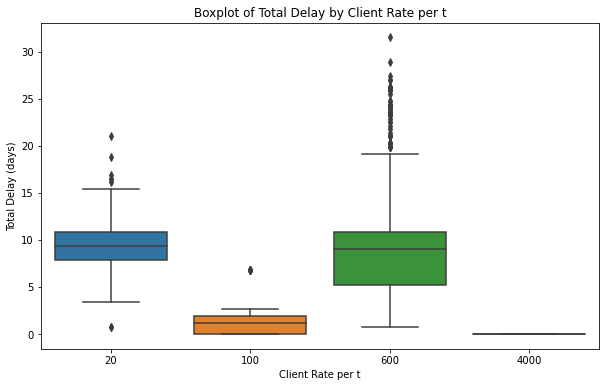

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Client Rate per t', y='Total Delay', data=data_database)
plt.title('Boxplot of Total Delay by Client Rate per t')
plt.xlabel('Client Rate per t')
plt.ylabel('Total Delay (days)')
plt.show()

In [50]:
# Calculate the descriptive statistics for Total Delay grouped by Client rate per t:
delay_stats_by_client_rate = data_database.groupby('Client Rate per t')['Total Delay'].describe()

# Show the statistics
delay_stats_by_client_rate

,count,mean,std,min,25%,50%,75%,max
Client Rate per t,,,,,,,,
20,473.0,9.241808,2.566250,0.75,7.875,9.375,10.875,21.00
100,196.0,1.161352,1.530262,0.00,0.000,1.125,1.875,6.75
600,2468.0,8.725132,4.253289,0.75,5.250,9.000,10.875,31.50
4000,182.0,0.000000,0.000000,0.00,0.000,0.000,0.000,0.00


In [48]:
data_database['Client Rate per t'].unique()

array([ 600,  100,   20, 4000], dtype=int64)

Insight 16: The client rate per ton with '600 USD' seems to have higher median compared to others. Hence reducing the price could be one of the ways to resolve this issue. In the case of 600 USD, we have more outliers but the data is symmetric.

Even though we cannot explain anything much comparing the mean and median of 20 and 600 USD which are slight close to each other, standard deviation of 600 USD seems to be more spreaded out compared to 20 USD. Hence the predictability of 20 USD is better than 600 USD.

In [73]:
#SUpplier rate per t:

In [75]:
data_database['Supplier Rate per t'].unique()

array([ 300, 2000,   10,   80, 2500], dtype=int64)

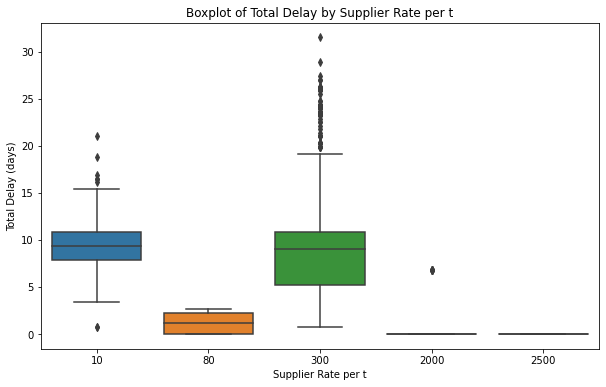

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Supplier Rate per t', y='Total Delay', data=data_database)
plt.title('Boxplot of Total Delay by Supplier Rate per t')
plt.xlabel('Supplier Rate per t')
plt.ylabel('Total Delay (days)')
plt.show()

In [51]:
# Calculate the descriptive statistics for Total Delay grouped by Supplier rate by t:
delay_stats_by_supplier_rate = data_database.groupby('Supplier Rate per t')['Total Delay'].describe()

# Show the statistics
delay_stats_by_supplier_rate

,count,mean,std,min,25%,50%,75%,max
Supplier Rate per t,,,,,,,,
10,473.0,9.241808,2.566250,0.75,7.875,9.375,10.875,21.000
80,148.0,1.127534,0.913857,0.00,0.000,1.125,2.250,2.625
300,2468.0,8.725132,4.253289,0.75,5.250,9.000,10.875,31.500
2000,48.0,1.265625,2.662489,0.00,0.000,0.000,0.000,6.750
2500,182.0,0.000000,0.000000,0.00,0.000,0.000,0.000,0.000


Insight 17: Rates 10 and 300 USD has more delay times. Exactly it is tough to find out the reasons behind it, because the rate 80 seems to have drastically lesser delay times. However standard deviation of 300 seems to be higher compared to 10, which shows that the delay times are more spread out around the mean for 300 USD. We can conclude that delay times of 10 USD is more predictable than 300 USD.

In [76]:
#Transporter invoice status:

In [77]:
data_database['Transporter Invoice status'].unique()

array(['Invoiced', 'Paid', nan, 'Approval Pending', 'Draft'], dtype=object)

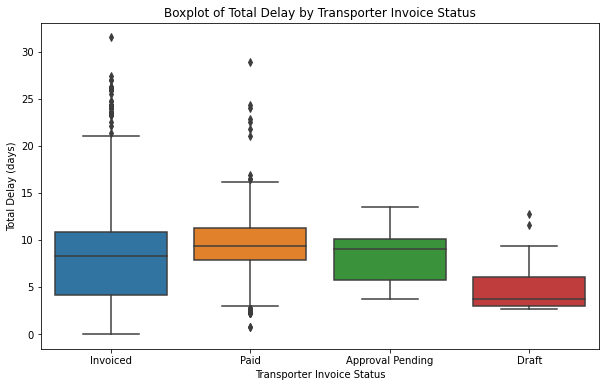

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transporter Invoice status', y='Total Delay', data=data_database)
plt.title('Boxplot of Total Delay by Transporter Invoice Status')
plt.xlabel('Transporter Invoice Status')
plt.ylabel('Total Delay (days)')
plt.show()

In [79]:
# Calculate the descriptive statistics for Total Delay grouped by Transporter Invoice status
delay_stats_by_trans_invoice_status = data_database.groupby('Transporter Invoice status')['Total Delay'].describe()

# Show the statistics
delay_stats_by_trans_invoice_status

,count,mean,std,min,25%,50%,75%,max
Transporter Invoice status,,,,,,,,
Approval Pending,102.0,8.297794,2.427797,3.750,5.71875,9.000,10.125,13.500
Draft,32.0,4.968750,2.710865,2.625,3.00000,3.750,6.000,12.750
Invoiced,2045.0,7.782396,5.029992,0.000,4.12500,8.250,10.875,31.500
Paid,601.0,9.195300,3.494147,0.750,7.87500,9.375,11.250,28.875


Insight 18: From the analysis, apart from 'Draft' all others seems to have closer median values.

However, standard deviation of 'Paid' seems to be having outliers on both sides. The presence of outliers on both sides can impact the interpretation of the data. It indicates that there are values that are significantly different from the majority of the data points, and they can potentially affect the overall statistics and conclusions drawn from the data.

#### However, majority of delays are for 'Invoiced', between 4.12 and 10.87. Making the status paid will reduce the delays.

In [82]:
#Depart From:

In [81]:
data_database['Depart From'].unique()

array(['Mogadishu', 'Mombasa', 'Marrakech', 'Addis Ababa', 'Zanzibar'],
      dtype=object)

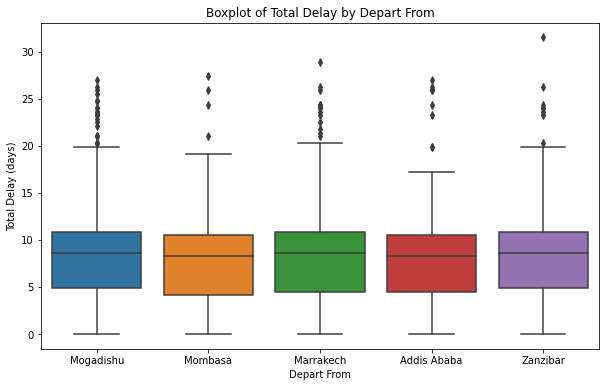

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Depart From', y='Total Delay', data=data_database)
plt.title('Boxplot of Total Delay by Depart From')
plt.xlabel('Depart From')
plt.ylabel('Total Delay (days)')
plt.show()

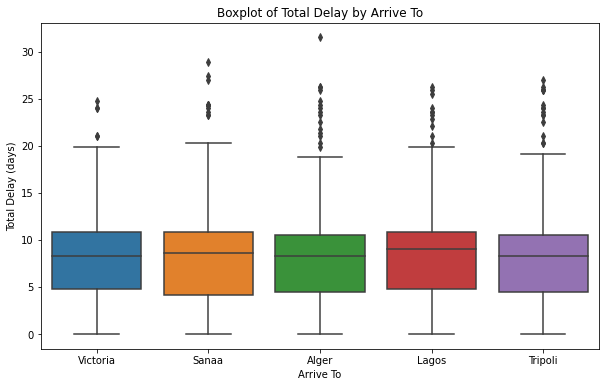

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Arrive To', y='Total Delay', data=data_database)
plt.title('Boxplot of Total Delay by Arrive To')
plt.xlabel('Arrive To')
plt.ylabel('Total Delay (days)')
plt.show()

#### Both variables 'Arrive To' and 'Transport From' seems to have same statistics, hence shall be avoided from the analytics.